In [1]:
import os
import sys
import operator
from pathlib import Path
from dotenv import load_dotenv
from langchain_core.documents import Document
from langchain_teddynote import logging

# 프로젝트 루트를 Python 경로에 추가 (rag 모듈 import를 위해 필요)
project_root = Path().resolve().parent if Path().resolve().name == "LangGraph" else Path().resolve()
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))
    print(f"✅ 프로젝트 루트 추가됨: {project_root}")

✅ 프로젝트 루트 추가됨: C:\Users\rkddn\YAI-NLP


In [2]:
#LangSmith 추적 설정
load_dotenv()
# os.environ["LANGCHAIN_TRACING_V2"] = "true"
# os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
# os.environ["LANGCHAIN_PROJECT"] = "LangSmith_YAI"
# os.environ["LANGCHAIN_API_KEY"] = os.getenv("LANGCHAIN_API_KEY")

# from langchain_teddynote import logging

# logging.langsmith("YAI-NLP-Project")

#추적 안 하고 싶을 때
#logging.langsmith("YAI-NLP-Project", set_enable=False)

True

In [3]:
from rag.pdf import PDFRetrievalChain

hf_token = os.getenv("HF_API_KEY")
if hf_token:
    os.environ["HF_API_KEY"] = hf_token
else:
    print("⚠️ 경고: HF_API_KEY이 없습니다.")


print("🚀 Hugging Face 기반 체인 생성 시작...")
# 이렇게 써도 프로젝트 data/testdata.pdf 로 해석됨
pdf = PDFRetrievalChain(["nlp.pdf"]).create_chain()
print("✅ 체인 생성 완료!")

pdf_retriever = pdf.retriever
pdf_chain = pdf.chain

🚀 Hugging Face 기반 체인 생성 시작...


Could not get FontBBox from font descriptor because None cannot be parsed as 4 floats
Could not get FontBBox from font descriptor because None cannot be parsed as 4 floats
Could not get FontBBox from font descriptor because None cannot be parsed as 4 floats
Could not get FontBBox from font descriptor because None cannot be parsed as 4 floats


✅ 체인 생성 완료!


In [4]:
search_result = pdf.retriever.invoke("닷-프로덕트 어텐션에 대해 설명해주세요")
search_result

[Document(id='1d247e53-5749-47a2-8855-1eb752153afb', metadata={'source': 'nlp.pdf', 'file_path': 'nlp.pdf', 'page': 1, 'total_pages': 7, 'Creator': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36', 'Producer': 'Skia/PDF m118', 'CreationDate': "D:20231103094424+00'00'", 'ModDate': "D:20231103094424+00'00'"}, page_content='3. 닷-프로덕트 어텐션(Dot-Product Attention)\n어텐션은 다양한 종류가 있는데 그 중에서도 가장 수식적으로 이해하기 쉽게 수식을 적용한 닷-프로덕트 어텐션(Dot-Product\nAttention)을 통해 어텐션을 이해해봅시다. seq2seq에서 사용되는 어텐션 중에서 닷-프로덕트 어텐션과 다른 어텐션의 차이는 주로\n중간 수식의 차이로 메커니즘 자체는 거의 유사합니다.'),
 Document(id='a87a31ef-2438-4d75-aea4-7ea507c9b115', metadata={'source': 'nlp.pdf', 'file_path': 'nlp.pdf', 'page': 6, 'total_pages': 7, 'Creator': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36', 'Producer': 'Skia/PDF m118', 'CreationDate': "D:20231103094424+00'00'", 'ModDate': "D:20231103094424+00'00'"}, page_content='지

In [5]:
answer = pdf_chain.invoke(
    {
        "question": "닷-프로덕트 어텐션에 대해 설명해주세요. 반드시 한글로 설명하세요요",
        "context": search_result,
        "chat_history": [],
    }
)
print(answer)

닷-프로덕트 어텐션(Dot-Product Attention)은 어텐션 메커니즘 중 하나로, 어텐션 스코어를 구하는 방법이 내적(점곱) 연산을 사용하는 것을 특징으로 합니다. 이 어텐션은 루옹(Luong) 어텐션이라고도 불리며, 어텐션 스코어를 구하는 방법이 간단하고 직관적입니다.

닷-프로덕트 어텐션의 기본 아이디어는 디코더에서 출력 단어를 예측하는 매 시점마다, 인코더에서의 전체 입력 문장을 다시 한 번 참고한다는 점입니다. 하지만 전체 입력 문장을 전부 다 동일한 비율로 참고하는 것이 아니라, 해당 시점에서 예측해야할 단어와 연관이 있는 입력 단어 부분을 좀 더 집중해서 보게 됩니다.

닷-프로덕트 어텐션의 수식은 다음과 같습니다.

αt = softmax(et)

여기서 αt는 디코더의 시점 t에서의 어텐션 가중치의 모음값인 어텐션 분포를 나타내고, e는 어텐션 스코어를 나타냅니다. 어텐션 스코어는 Query, Keys, Values를 사용하여 계산됩니다.

Q = Query : t 시점의 디코더 셀에서의 은닉 상태
K = Keys : 모든 시점의 인코더 셀의 은닉 상태들
V = Values : 모든 시점의 인코더 셀의 은닉 상태들

어텐션 스코어를 구하는 방법은 다음과 같습니다.

e = Q * K^T

여기서 *는 내적 연산을 나타내고, ^T는 transpose 연산을 나타냅니다. 어텐션 스코어를 구한 후, softmax 함수를 사용하여 어텐션 분포를 계산합니다.


In [6]:
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages

# 에이전트 상태를 정의하는 타입 딕셔너리, 메시지 시퀀스를 관리하고 추가 동작 정의
class AgentState(TypedDict):
    # add_messages reducer 함수를 사용하여 메시지 시퀀스를 관리
    messages: Annotated[Sequence[BaseMessage], add_messages]

In [7]:
from typing import TypedDict, Annotated, List
from langgraph.graph.message import add_messages

class GraphState(TypedDict):
    #policy: Annotated[str, "Policy"] #누적됨
    question: Annotated[str, "Question"]
    context: Annotated[str, "Context"]
    answer: Annotated[str, "Answer"]
    messages: Annotated[list, add_messages] #메시지(누적되는 list)
    relevance: Annotated[str, "Relevance"]

    """
    context 구성요소
    1. 챗봇 대화 기록
    2. 웹 검색 결과
    3. 시스템 프롬프트
    4. [POLICY]
    5. 사용자 질문
    6. 최근에 retrieve 한 내용


    context내에서 처리 or retrieve?
    -> 프롬프트 내에 연관성이 있는 맥락이 있는지 서치하는 LLM 모델 필요할 듯
    """
    

<h3>노드 정의</h3>

Relevance 체크용 모델

In [8]:
from huggingface_hub import login
login(token=os.getenv("HF_API_KEY"))

In [9]:
#일단 Relevance용 모델 정의
from langchain_huggingface import ChatHuggingFace, HuggingFaceEndpoint

hf_llm = HuggingFaceEndpoint(
    repo_id="meta-llama/Llama-3.1-8B-Instruct",
    task="conversational",
    temperature=0.0,
    max_new_tokens=512,
)

chat_hf = ChatHuggingFace(llm=hf_llm)

In [49]:
import json
import re
from langchain_teddynote.evaluator import GroundednessChecker
from langchain_teddynote.messages import messages_to_history
from rag.utils import format_docs

def retrieve_or_not(state: GraphState) -> str:
    """
    사용자 질문에 대해 문서 검색(retrieve)이 필요한지 판단.
    - 검색 불필요 → "not retrieve" → llm_answer로 직행
    - 검색 필요 → "retrieve" → retrieve 노드로 이동
    Hugging Face Meta Llama(chat_hf) 사용.
    """
    question = state["question"]
    if not question:
        return "not retrieve"

    prompt = f"""
                다음 사용자 질문에 답하려면 **문서/벡터DB 검색(retrieve)**이 필요한지 판단하세요.

                판단 기준:
                - 인사, 감정, 단순 대화("안녕", "고마워", "뭐해" 등), 잡담 → 검색 불필요
                - 문서에 있을 법한 전문 지식 질문 → 검색 필요
                - 최신 정보/뉴스(노벨상, 날짜별 사건 등) → 검색 필요

                질문: {question}

                *반드시 아래 JSON 형식으로만 답하세요. 다른 텍스트 없이 JSON만 출력.
                {{"need_retrieve": "yes"}} 또는 {{"need_retrieve": "no"}}
                """

    try:
        response = chat_hf.invoke(prompt)
        text = (response.content or "").strip()
        match = re.search(r"\{[^{}]*\"need_retrieve\"[^{}]*\}", text)
        if match:
            data = json.loads(match.group(0))
            need = (data.get("need_retrieve") or "no").lower()
            if need in ("yes", "true", "1"):
                print("==============retrieve Node============")
                return "retrieve"
        print("==============go to llm_answer============")
        return "not retrieve"
    except Exception:
        return "retrieve"


def upload_to_vectorDB(state: GraphState) -> bool:
    if "Search 함수에서 찾은 내용을 -> 벡터DB에 업로드 성공":
        return True
    else:
        return False

def multiturn_chat_to_vectorDB(state: GraphState) -> bool:
    if "컨텍스트가 너무 길어져서 -> 벡터DB에 업로드 성공":
        return True
    else:
        return False
    
"""===========노드 정의=========="""



def retrieve(state: GraphState) -> GraphState:
    latest_question = state["question"]
    retrieved_docs = pdf_retriever.invoke(latest_question)
    formatted_docs = format_docs(retrieved_docs)
    return GraphState(context=formatted_docs)
    #same as return {"context": formatted_docs}

def llm_answer(state: GraphState) -> GraphState:
    # 질문을 상태에서 가져옵니다.
    latest_question = state["question"]

    # 검색된 문서를 상태에서 가져옵니다.
    context = state["context"]
    print("context[:100]",context[0])
    # 체인을 호출하여 답변을 생성합니다.
    chat_history = state.get("messages", [])
    response = pdf_chain.invoke(
        {
            "question": latest_question,
            "context": context[:1],
            "chat_history": chat_history,
        }
    )
    # 생성된 답변, (유저의 질문, 답변) 메시지를 상태에 저장합니다.
    return GraphState(
        answer=response, messages=[("user", latest_question), ("assistant", response)]
    )

Relevance Check Node (question-retrieve)

In [50]:
import json
import re

def relevance_check(state: GraphState) -> GraphState:
    prompt = f"""
You are a grader assessing whether a retrieved document is relevant to the given question.
Return ONLY valid JSON like: {{"score": "yes"}} or {{"score": "no"}}.

Question:
{state["question"]}

Retrieved document:
{state["context"]}
""".strip()

    # HF 모델 호출
    response = chat_hf.invoke(prompt)

    # ChatHuggingFace는 보통 response.content에 텍스트가 들어있음
    text = response.content.strip()

    # JSON만 추출 (모델이 앞뒤에 텍스트를 섞는 경우 대비)
    match = re.search(r"\{.*\}", text, re.DOTALL)
    if match:
        text = match.group(0)

    try:
        data = json.loads(text)
        score = data.get("score", "no").lower()
    except Exception:
        score = "no"

    if score not in ["yes", "no"]:
        score = "no"

    print("==== [RELEVANCE CHECK] ====")
    print(score)

    return {"relevance": score}

def is_relevant(state: GraphState) -> str:
    if state["relevance"] == "yes":
        return "relevant"
    else:
        return "not relevant"

Web Search Node

In [51]:
from langchain_teddynote.tools.tavily import TavilySearch

def web_search(state: GraphState) -> GraphState:
        
    tavily_tool = TavilySearch()

    search_query = state["question"]
    #search_query = state["question"]
    #state에 key값으로 max_results 추가해서 동적으로 조정 가능
    search_result = tavily_tool.search(
        query=search_query,
        topic="general",
        max_results=3,
        format_output=True,
        #include_domains=["news.naver.com"],
    )

    print(search_result)
    """
    +++++ 웹에서 서치한 결과를 바로 VectorDB에 저장할 것인가?
    call write_to_vectorDB(to_write=search_result)
    """
    return GraphState(context=search_result)


<h3>그래프 생성</h3>

In [55]:
from langgraph.graph import END, StateGraph, START
from langgraph.checkpoint.memory import MemorySaver

workflow = StateGraph(GraphState)

workflow.add_node("retrieve", retrieve)
workflow.add_node("llm_answer", llm_answer)
workflow.add_node("relevance_check", relevance_check)
workflow.add_node("web_search", web_search)

workflow.add_conditional_edges(
    START,
    retrieve_or_not,
    {
        "retrieve": "retrieve",
        "not retrieve": "llm_answer",
    },
)

workflow.add_edge("retrieve", "relevance_check")

workflow.add_conditional_edges(
    "relevance_check",
    is_relevant,
    {
        "relevant": "llm_answer",
        "not relevant": "web_search",
    },
)

workflow.add_edge("web_search", "llm_answer")
workflow.add_edge("llm_answer", END)
workflow.set_entry_point("retrieve")
memory = MemorySaver()

app = workflow.compile(checkpointer=memory)

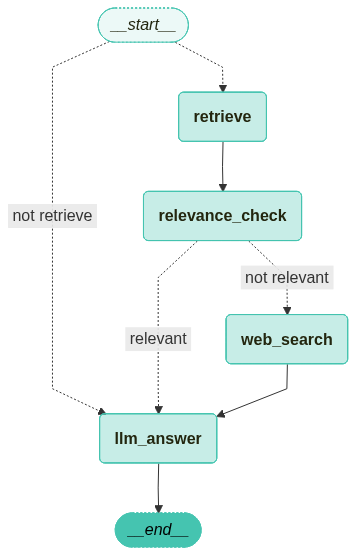

In [56]:
from langchain_teddynote.graphs import visualize_graph
visualize_graph(app)

<h3>그래프 실행</h3>

In [58]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import invoke_graph, random_uuid

config = RunnableConfig(recursion_limit=10, configurable={"thread_id": random_uuid()})

inputs = GraphState(question="닷 프로덕트 어텐션에 대해 설명해줘")

invoke_graph(app, inputs, config, node_names=["relevance_check", "llm_answer"])

==============retrieve Node============
==== [RELEVANCE CHECK] ====
yes

🔄 Node: relevance_check 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
relevance:
yes
context[:100]  

🔄 Node: llm_answer 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
answer:
닷 프로덕트 어텐션(Dot Product Attention)은 어텐션 메커니즘의 한 종류입니다. 이 메커니즘은 입력 시퀀스의 각 요소 간의 점곱을 계산하여 중요도를 결정하는 방식으로, 시퀀스 간의 상호작용을 강조합니다. 닷 프로덕트 어텐션은 트랜스포머 모델에서 사용되는 어텐션 메커니즘 중 하나입니다.
('user', '닷 프로덕트 어텐션에 대해 설명해줘')
('assistant', '닷 프로덕트 어텐션(Dot Product Attention)은 어텐션 메커니즘의 한 종류입니다. 이 메커니즘은 입력 시퀀스의 각 요소 간의 점곱을 계산하여 중요도를 결정하는 방식으로, 시퀀스 간의 상호작용을 강조합니다. 닷 프로덕트 어텐션은 트랜스포머 모델에서 사용되는 어텐션 메커니즘 중 하나입니다.')


In [ ]:
from langchain_teddynote.messages import stream_graph
stream_graph(app, inputs, config)

In [ ]:
outputs = app.get_state(config).values

print(f'Question: {outputs["question"]}')
print("===" * 20)
print(f'Answer:\n{outputs["answer"]}')